In [1]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

In [6]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Data preparation

In [7]:
df = df.assign(rooms_per_household = (df['total_rooms']/df['households']))
df = df.assign(bedrooms_per_room = (df['total_bedrooms']/df['total_rooms']))
df = df.assign(population_per_household  = (df['population']/df['households']))

In [8]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


#### Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

Options:

* NEAR BAY
* <1H OCEAN
* INLAND
* NEAR OCEAN

In [9]:
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

#### Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value (median_house_value) is not in your dataframe.

In [10]:
%%time

from sklearn.model_selection import train_test_split

#X = df.drop('median_house_value', axis = 1)
#y = df['median_house_value']

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state = 42)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

Wall time: 650 ms


#### Question 2

Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?

Options:

* total_bedrooms and households
* total_bedrooms and total_rooms
* population and households
* population_per_household and total_rooms

In [11]:
options_1 = ['total_bedrooms', 'households']
options_2 = ['total_bedrooms', 'total_rooms']
options_3 = ['population', 'households']
options_4 = ['population_per_household', 'total_rooms']

list_of_options = [options_1, options_2, options_3, options_4]

for i in range(len(list_of_options)):
    col_a = list_of_options[i][0]
    col_b = list_of_options[i][1]
    
    coeff_score = df_train[col_a].corr(df_train[col_b])
    print(f' {i+1}. {col_a} & {col_b}: {round(coeff_score, 2)}')

 1. total_bedrooms & households: 0.98
 2. total_bedrooms & total_rooms: 0.93
 3. population & households: 0.91
 4. population_per_household & total_rooms: -0.03


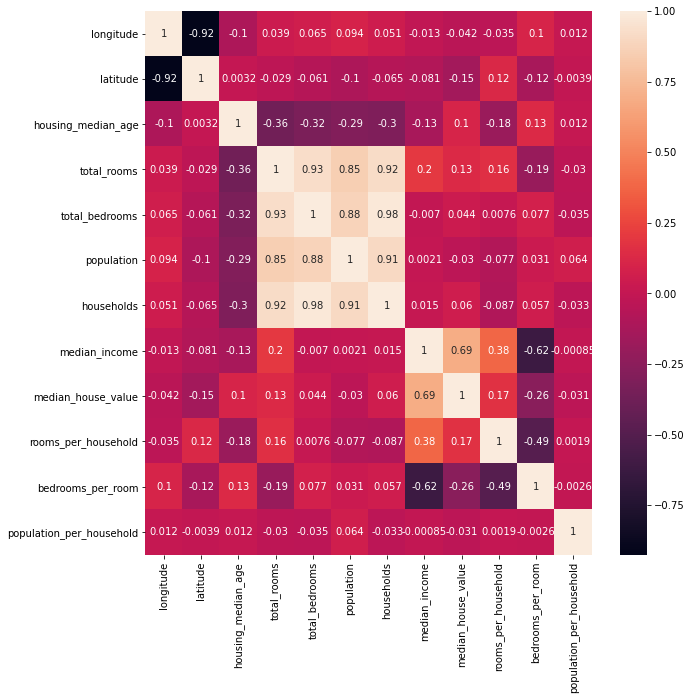

Wall time: 1.29 s


In [12]:
%%time

import matplotlib.pyplot as plt
import seaborn as sns

#df_train_numerical = df_train.copy()
plt.figure(figsize = (10,10))

sns.heatmap(df_train.corr(), annot = True)
plt.show()

Answer = total_bedrooms and households

#### Make median_house_value binary

- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [13]:
df_train['median_house_value'].mean()

206691.72639866758

In [14]:
def encode_target_variable(x):
    mean_value = df_train['median_house_value'].mean()
    return 1 if x > mean_value else 0

In [15]:
df_train['above_average'] = df_train['median_house_value'].apply(lambda x: encode_target_variable(x))

#### Question 3
- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. 
- Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)

Options:

* 0.263
* 0.00001
* 0.101
* 0.15555

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html

Mutual Information between two clusterings. <br>

The Mutual Information is a measure of the similarity between two labels of the same data. Where  is the number of the samples in cluster  and  is the number of the samples in cluster , the Mutual Information between clusterings  and  is given as:

In [16]:
from sklearn.metrics import mutual_info_score

#def calculate_mi(series):
#    return mutual_info_score(series, df_train.above_average)

#df_mi = df_train['ocean_proximity'].apply(calculate_mi)
#df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

#print(df_mi)
mutual_info_score(df_train['ocean_proximity'], df_train['above_average'])

0.102947541090526

#### Question 4

Now let's train a logistic regression <br>
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding. <br>
Fit the model on the training dataset. <br>
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters: <br><br>

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)<br>
Calculate the accuracy on the validation dataset and round it to 2 decimal digits. <br>

Options:
* 0.60
* 0.72
* 0.84
* 0.95

##### One Hot Encoding 1

In [17]:
from sklearn.feature_extraction import DictVectorizer

In [18]:
X = df_train.drop(['above_average', 'median_house_value'] , axis = 1)
y = df_train['above_average']

dict_X= X.to_dict(orient = 'records')

In [19]:
dict_X[0]

{'longitude': -120.97,
 'latitude': 38.0,
 'housing_median_age': 27.0,
 'total_rooms': 1683.0,
 'total_bedrooms': 288.0,
 'population': 873.0,
 'households': 258.0,
 'median_income': 4.7069,
 'ocean_proximity': 'INLAND',
 'rooms_per_household': 6.523255813953488,
 'bedrooms_per_room': 0.1711229946524064,
 'population_per_household': 3.383720930232558}

In [20]:
dv = DictVectorizer(sparse = False)
dv.fit(dict_X)

DictVectorizer(sparse=False)

In [21]:
vectorized_X = dv.transform(dict_X)

In [22]:
dv.get_feature_names()

['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [23]:
for i in range(len(vectorized_X[0])):
    print(f'{i+1}. {np.round(vectorized_X[0][i], 2)}')

1. 0.17
2. 258.0
3. 27.0
4. 38.0
5. -120.97
6. 4.71
7. 0.0
8. 1.0
9. 0.0
10. 0.0
11. 0.0
12. 873.0
13. 3.38
14. 6.52
15. 288.0
16. 1683.0


In [24]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver = 'liblinear', C = 1.0, max_iter = 1000, random_state = 42)
model.fit(vectorized_X, y)

Wall time: 141 ms


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [25]:
df_val

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.85,36.74,35.0,1191.0,190.0,537.0,182.0,3.5375,96700.0,INLAND,6.543956,0.159530,2.950549
1,-124.16,41.02,23.0,1672.0,385.0,1060.0,390.0,2.1726,75500.0,NEAR OCEAN,4.287179,0.230263,2.717949
2,-117.92,33.67,14.0,6224.0,1679.0,3148.0,1589.0,4.2071,430900.0,<1H OCEAN,3.916929,0.269762,1.981120
3,-118.45,34.15,10.0,1091.0,260.0,517.0,266.0,4.1727,332600.0,<1H OCEAN,4.101504,0.238313,1.943609
4,-117.90,33.63,28.0,2370.0,352.0,832.0,347.0,7.1148,500001.0,<1H OCEAN,6.829971,0.148523,2.397695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,-122.03,38.28,15.0,5114.0,833.0,2418.0,778.0,4.4882,144000.0,INLAND,6.573265,0.162886,3.107969
3299,-117.77,34.06,27.0,2178.0,629.0,2379.0,591.0,1.9766,108000.0,INLAND,3.685279,0.288797,4.025381
3300,-117.70,33.47,21.0,2208.0,534.0,1423.0,482.0,3.5915,305600.0,<1H OCEAN,4.580913,0.241848,2.952282
3301,-117.08,32.80,25.0,2963.0,552.0,1162.0,556.0,3.6250,184500.0,NEAR OCEAN,5.329137,0.186298,2.089928


In [26]:
%%time

df_val_test = df_val.copy()
df_val_test['above_average'] = df_val_test['median_house_value'].apply(lambda x: encode_target_variable(x))

X_val = df_val_test.drop(['median_house_value', 'above_average'], axis = 1)
y_val = df_val_test.above_average

dict_X_val= X_val.to_dict(orient = 'records')
X_val = dv.transform(dict_X_val)

#df_val_test = pd.get_dummies(df_val_test)
y_pred = model.predict(X_val)
print(f'Accuracy Score : {round((accuracy_score(y_pred, y_val)) , 3)}')

Accuracy Score : 0.828
Wall time: 205 ms


In [27]:
##### One Hot Encoding 2

#df_train = pd.get_dummies(df_train)

#### Question 5
Let's find the least useful feature using the feature elimination technique.<br>
Train a model with all these features (using the same parameters as in Q4). <br>
Now exclude each feature from this set and train a model without it. Record the accuracy for each model. <br>
For each feature, calculate the difference between the original accuracy and the accuracy without the feature. <br>
Which of following feature has the smallest difference? <br>

* total_rooms
* total_bedrooms
* population
* households <br>
note: the difference doesn't have to be positive

In [28]:
dv.get_feature_names()

['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [29]:
model.coef_[0].round(3)

array([ 0.103,  0.004,  0.036,  0.089,  0.079,  1.209,  0.448, -1.612,
        0.011,  0.322,  0.771, -0.002,  0.01 , -0.009,  0.002, -0.   ])

In [30]:
list(zip(dv.get_feature_names(), model.coef_[0].round(3)))

[('bedrooms_per_room', 0.103),
 ('households', 0.004),
 ('housing_median_age', 0.036),
 ('latitude', 0.089),
 ('longitude', 0.079),
 ('median_income', 1.209),
 ('ocean_proximity=<1H OCEAN', 0.448),
 ('ocean_proximity=INLAND', -1.612),
 ('ocean_proximity=ISLAND', 0.011),
 ('ocean_proximity=NEAR BAY', 0.322),
 ('ocean_proximity=NEAR OCEAN', 0.771),
 ('population', -0.002),
 ('population_per_household', 0.01),
 ('rooms_per_household', -0.009),
 ('total_bedrooms', 0.002),
 ('total_rooms', -0.0)]

In [33]:
original_accuracy_score = round((accuracy_score(y_pred, y_val)),3)
print(original_accuracy_score)

0.825


In [36]:
%%time

col_list = ['total_rooms', 'total_bedrooms', 'population', 'households']
count = 0
for i in col_list:
    X = df_train.drop(['above_average', 'median_house_value', i] , axis = 1)
    y = df_train['above_average']

    dict_X= X.to_dict(orient = 'records')
    dv = DictVectorizer(sparse = False)
    dv.fit(dict_X)
    
    vectorized_X = dv.transform(dict_X)
    
    model = LogisticRegression(solver = 'liblinear', C = 1.0, max_iter = 1000, random_state = 42)
    model.fit(vectorized_X, y)
    
    df_val_test = df_val.copy()
    df_val_test['above_average'] = df_val_test['median_house_value'].apply(lambda x: encode_target_variable(x))

    X_val = df_val_test.drop(['median_house_value', 'above_average', i], axis = 1)
    y_val = df_val_test.above_average

    dict_X_val= X_val.to_dict(orient = 'records')
    X_val = dv.transform(dict_X_val)

    #df_val_test = pd.get_dummies(df_val_test)
    y_pred = model.predict(X_val)
    current_accuracy_score = round((accuracy_score(y_pred, y_val)),3)
    print(f'{count+1}. {i}: Accuracy Score : {current_accuracy_score}. Difference between original & current one {round((original_accuracy_score - current_accuracy_score), 2)}')
    count +=1

1. total_rooms: Accuracy Score : 0.829. Difference between original & current one -0.0
2. total_bedrooms: Accuracy Score : 0.83. Difference between original & current one -0.01
3. population: Accuracy Score : 0.82. Difference between original & current one 0.01
4. households: Accuracy Score : 0.825. Difference between original & current one 0.0
Wall time: 2.29 s


Answer: Households

#### Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn. <br>
We'll need to use the original column 'median_house_value'. <br>
Apply the logarithmic transformation to this column. <br>
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data. <br>
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10] <br>
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits. <br>
If there are multiple options, select the smallest alpha. <br>

Options:

* 0
* 0.01
* 0.1
* 1
* 10

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [52]:
X = df_train.drop(['above_average', 'median_house_value'], axis = 1)
y = df_train.median_house_value

dict_X= X.to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
dv.fit(dict_X)
vectorized_X = dv.transform(dict_X)

y = np.log(y)

In [58]:
%%time

alpha_list = [0, 0.01, 0.1, 1, 10]

for alpha_value in alpha_list:
    model = Ridge(alpha = alpha_value, solver = 'sag', random_state = 42)
    model.fit(vectorized_X, y)
    
    df_val_test = df_val.copy()
    X_val = df_val_test.drop('median_house_value', axis = 1)
    y_val = df_val_test.median_house_value

    dict_X_val= X_val.to_dict(orient = 'records')
    X_val = dv.transform(dict_X_val)

    y_pred = model.predict(X_val)
    print(f'Alpha_Value: {alpha_value}, RMSE: {round(mean_squared_error(y_pred, y_val, squared = False), 3)}')

0
Alpha_Value: 0, RMSE: 239920.811
0.01
Alpha_Value: 0.01, RMSE: 239920.811
0.1
Alpha_Value: 0.1, RMSE: 239920.811
1
Alpha_Value: 1, RMSE: 239920.811
10
Alpha_Value: 10, RMSE: 239920.811
Wall time: 9.55 s
